<a href="https://colab.research.google.com/github/alendoko/bina_private/blob/main/LB1/CODE/Mein_erstes_BI_Projekt_Loesung_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Analyse des Gesamtumsatzes und Gewinns im Superstore-Datensatz
In diesem Notebook analysieren wir den **Gesamtumsatz** und **Gesamtgewinn** des Superstore-Datensatzes. Wir verwenden dazu **Python (Pandas, Matplotlib)** für die Berechnungen und Visualisierung.

**Datenquelle:** [Superstore-Datensatz von Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

## 🔹 1. Bibliotheken importieren
Wir laden die notwendigen Bibliotheken für unsere Analyse.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib-Style setzen
plt.style.use('ggplot')

## 📂 2. Titanic-Daten einlesen
Wir lesen die Titanic-Daten der Seaborn Bibliothek ein.

In [28]:
# Titanic-Dataset in ein DataFrame laden
df = sns.load_dataset("titanic")

# Erste Zeilen anzeigen
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔍 3. Überblick über die Daten
Bevor wir die Berechnungen durchführen, prüfen wir die Struktur des Datensatzes.

In [29]:
# Spaltennamen anzeigen
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [30]:
# Daten-Typen und Nullwerte checken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Anzahl der eindeutigen Werte pro Spalte überprüfen

In [31]:
df.nunique().sort_values(ascending=False)

fare           248
age             88
sibsp            7
parch            7
deck             7
pclass           3
embarked         3
class            3
who              3
embark_town      3
survived         2
sex              2
adult_male       2
alive            2
alone            2
dtype: int64

### Am meisten vorkommende Werte pro Spalte identifizieren

In [32]:
df.describe(include='all').T[['top', 'freq']]

,top,freq
survived,NaN,NaN
pclass,NaN,NaN
sex,male,577
age,NaN,NaN
sibsp,NaN,NaN
parch,NaN,NaN
fare,NaN,NaN
embarked,S,644
class,Third,491
who,man,537


### Samples extrahieren

In [33]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
243,0,3,male,22.0,0,0,7.1250,S,Third,man,True,NaN,Southampton,no,True
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
256,1,1,female,NaN,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
89,0,3,male,24.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
826,0,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True


## 4. Erwachsene und Kindern nach Geschlecht und Alter kategorisieren

In [34]:
df['person_type'] = df.apply( # Wendet eine Funktion auf alle Zeilen oder Spalten an
    lambda row: 'Boy' if row['age'] < 18 and row['sex'] == 'male' else # lamda definiert eine temporäre Funktion
                'Girl' if row['age'] < 18 and row['sex'] == 'female' else
                'Man' if row['sex'] == 'male' else
                'Woman', 
    axis=1 # Die Funktion wird auf alle Zeilen angewendet
)

# Vorschau der neuen Spalte
df[['sex', 'age', 'person_type']].head(10)

,sex,age,person_type
0,male,22.0,Man
1,female,38.0,Woman
2,female,26.0,Woman
3,female,35.0,Woman
4,male,35.0,Man
5,male,NaN,Man
6,male,54.0,Man
7,male,2.0,Boy
8,female,27.0,Woman
9,female,14.0,Girl


/var/folders/p7/_dhlrgy92z5d1j7jd4rvn70r0000gn/T/ipykernel_49730/405672737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='person_type', y='survived', data=df_sorted, order=df_sorted['person_type'],


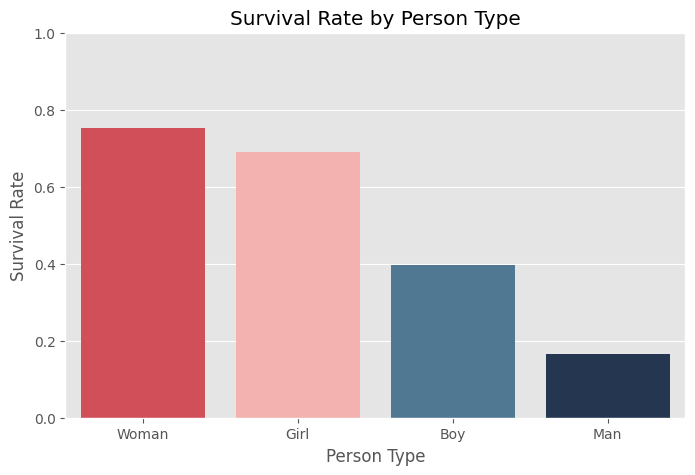

In [35]:
# Harmonische Farbpalette mit abgestuften Rottönen für Frauen & Blautönen für Männer
color_palette = {
    'Woman': '#E63946',    # Kräftiges Rot
    'Girl': '#FFA7A3',     # Helles Rosa
    'Man': '#1D3557',      # Dunkles Blau
    'Boy': '#457B9D'       # Helles Blau
}

# Überlebensrate nach Personentyp berechnen & nach höchster Überlebensrate sortieren
df_sorted = df.groupby('person_type', as_index=False)['survived'].mean().sort_values(by='survived', ascending=False)

# Balkendiagramm mit korrekter Sortierung erstellen
plt.figure(figsize=(8,5))
ax = sns.barplot(x='person_type', y='survived', data=df_sorted, order=df_sorted['person_type'], 
                 palette=color_palette, dodge=False)

# Diagramm optimieren
plt.ylabel('Survival Rate')
plt.xlabel('Person Type')
plt.title('Survival Rate by Person Type')
plt.ylim(0, 1)  # Skaliert auf 0-1 für bessere Lesbarkeit

# Legende nur entfernen, wenn sie existiert
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.show()

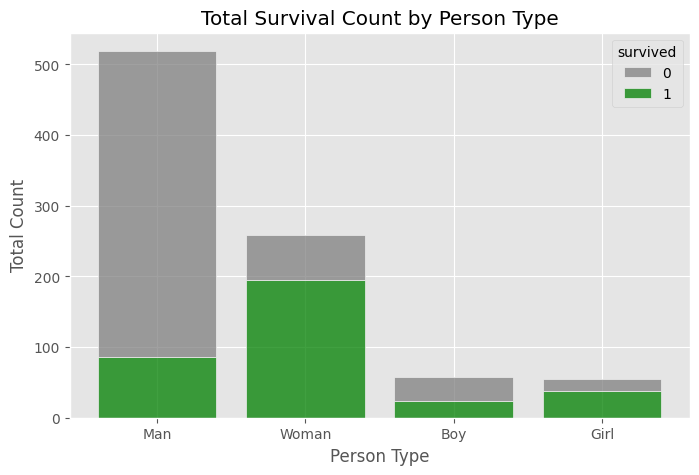

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='person_type', hue='survived', multiple='stack', 
             palette={0: "gray", 1: "green"}, shrink=0.8)

plt.ylabel('Total Count')
plt.xlabel('Person Type')
plt.title('Total Survival Count by Person Type')
plt.show()

## 📊 5. Visualisierung von Umsatz & Gewinn
Wir stellen die beiden Kennzahlen als **Balkendiagramm** dar.

## 🏁 6. Fazit
- Der **Gesamtumsatz** zeigt, wie viel der Superstore insgesamt verkauft hat.
- Der **Gesamtgewinn** zeigt, ob das Unternehmen profitabel ist.
- Durch eine genauere Analyse können wir herausfinden, welche **Produkte, Regionen oder Kundentypen** am meisten zum Gewinn beitragen.

💡 **Nächste Schritte:** Tiefere Analysen nach Produktkategorien oder Regionen durchführen!